# Analize the dataset (Normalize values and Height-weight)

---

This notebook contains the codebase for the analysis of the Dataset. It uses `torch` and `torchvision` compute the analysis and `matplotlib` to demostrate the results.

This notebook has analysis several things, like

1. The Normalize values of the dataset i.e. the `Mean` and `STD`
2. The heights and weights of the images in the dataset

In [1]:
import statistics
import numpy as np

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt

---

Using the `ImageFolder` function from `torchvision` to load the dataset with `ToTensor` transform, so that each image will convert into `Tensor` and will help to compute easily

In [2]:
f = ImageFolder(root="./dataset/", transform=transforms.Compose([transforms.ToTensor()]))

---

Computing the `Normalization` values i.e. the overall mean and std by iterating over the dataset.

To get the `mean` and `std` values,

1. It is computing the `mean` and `std` for a single image. 
2. The computation is taking place by dimention-wise, i.e. For `Red, Greeen and Blue channels`, it is computing separate mean and std.
3. In a zero tensor of dimention 3 (1 for R, 1 for G, 1 for B), it is adding up the mean and std.

The code base also appending the image height and image weight in 2 empty arrays for future analysis.

In [3]:
mean = torch.zeros(3)
std = torch.zeros(3)

heights = []
widths = []

for image, _ in f:
    mean += torch.mean(image, (1,2))
    std += torch.std(image, (1,2))
    _, h, w = image.size()
    heights.append(h)
    widths.append(w)

---

Now dividing the summed mean and std values to get the overall Mean and STD. 

`This values of Mean and STD will be used for the normalization`

In [4]:
print(f"Mean: {mean/len(f)}")
print(f"STD: {std/len(f)}")

Mean: tensor([0.4906, 0.5203, 0.5372])
STD: tensor([0.2412, 0.2285, 0.2351])


***So, from the above analysis, I come to these conclusion, that***

1. Mean of the Whole dataset (train and test) is `[0.4906, 0.5203, 0.5372]`
2. Standard Deviation of the Whole dataset (train and test) is `[0.2412, 0.2285, 0.2351]`

---

### Now, it's time to analize the heights and widths

This is a histogram graph for heights

(array([  4.,   6.,  13.,  42., 148., 745., 266.,  34.,   6., 198.]),
 array([ 261. ,  362.9,  464.8,  566.7,  668.6,  770.5,  872.4,  974.3,
        1076.2, 1178.1, 1280. ]),
 [<matplotlib.patches.Polygon at 0x1f104676970>])

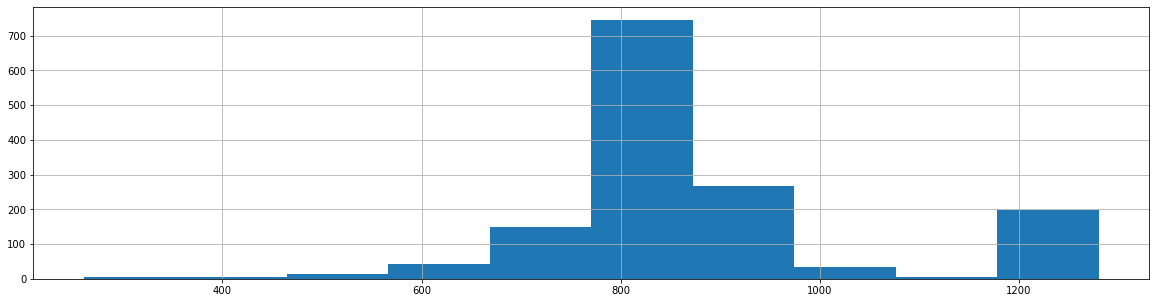

In [6]:
plt.figure(figsize=(20,5))
plt.grid()
plt.hist(heights, histtype='stepfilled')

This is a histogram graph for widths

(array([1.000e+00, 1.000e+00, 3.000e+00, 7.000e+00, 1.100e+01, 7.900e+01,
        4.100e+01, 1.900e+01, 7.000e+00, 1.293e+03]),
 array([ 309. ,  406.1,  503.2,  600.3,  697.4,  794.5,  891.6,  988.7,
        1085.8, 1182.9, 1280. ]),
 [<matplotlib.patches.Polygon at 0x1f10448c9a0>])

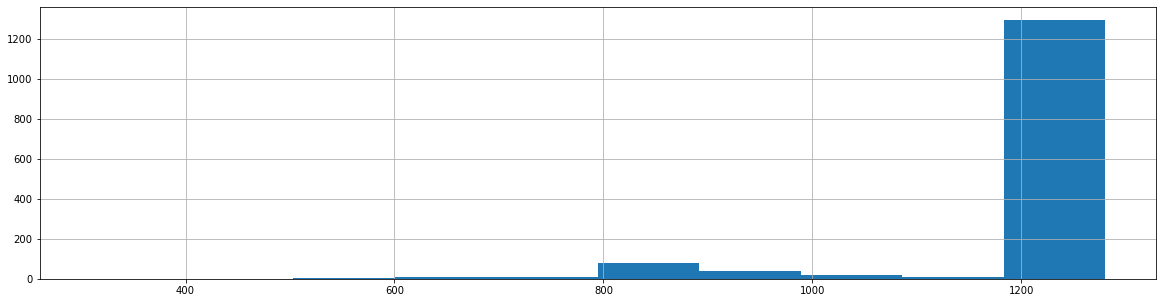

In [7]:
plt.figure(figsize=(20,5))
plt.grid()
plt.hist(widths, histtype='stepfilled')

In [8]:
print(f"Mean of the heights: {statistics.median(heights)} \nMean of the widths: {statistics.median(widths)}")

Mean of the heights: 853.0 
Mean of the widths: 1280.0


As the mejority of the images has the heightd and widths is more than 300 and as the imagenet models (which I used as transfer learning) is optimized for height and widths of `224` images. So I decided to keep 

- The height as `224` 
- The Width as `224`